# Quiz Capítulo 8
* **Juan Pablo Abril Serna**

## Pregunta 1.

¿Cuál es el problema que se presenta cuando el número de nodos es pequeño al analizar redes neuronales artificiales?


1. Si el número de nodos es pequeño, el número de operaciones a procesar es pequeño, por lo que se realiza rápidamente.
2. No se pueden crear límites complejos para la toma de decisiones al realizar un modelo de análisis.
3. No se puede realizar el algoritmo de retropropagación que ajusta pesos y umbrales.
4. El número de nodos no tiene nada que ver con el modelo de análisis.


<font color=red>[Respuesta]</font>

<h3> la respuesta es la 2, ya que cuando una red neuronal tiene pocos nodos baja su capacidad para tomar las decisiones segun los datos de entrada, por ende, si hay pocos nodos sera menos flexible  </h3>


## Pregunta 2.

¿Cuál es el concepto que se describe a continuación?

```
Matriz multidimensional con 3 componentes: rango, forma, tipo
```

<font color=red>[Respuesta]</font>

<h3>El concepto que se esta describiendo es el de Tensor, el tensor es muy usado en frameworks de aprendizaje profundo como TensorFlow</h3>

## Pregunta 3.

¿Qué sucede si el error de verificación aumenta constantemente cuando graficamos el error de verificación para cada `epoch` utilizando el método de descenso de pendiente por lotes?

Además, ¿cómo se puede solucionar este problema?


<font color=red>[Respuesta]</font>

<h3>Lo que sucede es que tiene un sobreajuste u overfitting, esto es debido a que el modelo esta muy ajustado a los datos de entrenamiento, para solucionar este problema puede ser: </h3>


*   Regularización

*  Aumentar los datos
*  EarlyStoping
*  Cross-validation



## Pregunta 4.

En la sigunte figura se presentan datos con una estructura tridimensional.
 1. Presente las ecuaciones de convolución para (a).
 2. Presente las ecuaciones de convolución para (b).

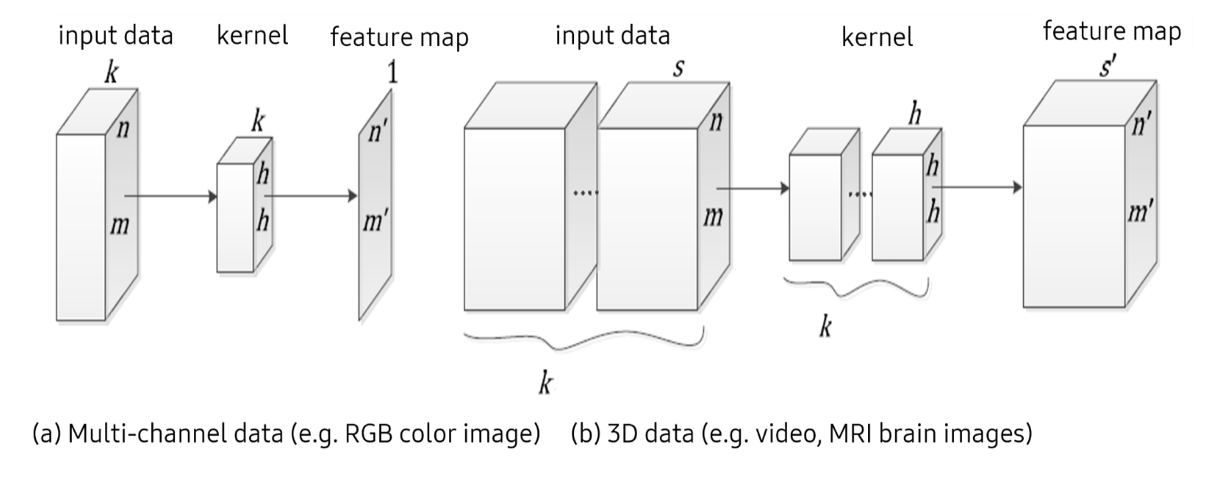

<font color=red>[Respuesta 1 y 2]</font>

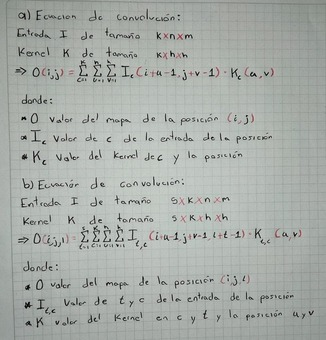

## Pregunta 5.

Aplica la función softmax cuando la salida de la red neuronal sea $(0.4,2.0,0.001,0.32)^T$ y escribe el resultado.

<font color=red>[Respuesta]</font>

In [ ]:
import numpy as np
# Salida de la red neuronal sea (0.4,2.0,0.001,0.32)
z = np.array([0.4, 2.0, 0.001, 0.32])

def softmax(z):
    e_z = np.exp(z - np.max(z))
    return e_z / e_z.sum(axis=0)

softmax_output = softmax(z)
print(softmax_output)

[0.13250053 0.65627943 0.08890663 0.12231341]


## Pregunta 6.

Entrena un modelo de predicción de series temporales basado en RNN haciendo referencia al siguiente código.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt

### Descarga datos

In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/MyDrive/Datos/"
data_path = "/content/drive/MyDrive/Datos/data_boston.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
data_boston.csv


In [ ]:
## ADVERTENCIA: Comentar esta celda si NO está trabajando dentro de Google Colaboratory
#from google.colab import drive
#drive.mount('/content/drive')
#os.getcwd()
#os.chdir("/MyDrive/Datos/data_boston.csv") ## Cambie esta ruta por la de su sistema de archivos
#os.getcwd()

In [ ]:
## En Jupyter: Dirígete al directorio donde se encuentra el archivo de datos.
#try:
 # os.chdir(r'~~') # Por favor, reemplaza la ruta en tu PC a 'data_boston.csv'
#except:
 # print('archivo no encontrado')

### Leer los datos

In [ ]:
df = pd.read_csv(data_path, header='infer', encoding='latin1')
# no use esta debido a error por el drive
# df = pd.read_csv('data_boston.csv', header='infer', encoding='latin1')

### Procesar

In [ ]:
df = df[['PRICE']]

# scale input & X, y
scaler = MinMaxScaler()
ts_scaled = scaler.fit_transform(df)

# sacle
ts_scaled_2 = ts_scaled.reshape(1, -1, 1)

In [ ]:
# training parameters
batch_size = 1
n_epochs  = 1000
learn_rate = 0.0001

In [ ]:
# model
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(None, 1)))

# por favor completa el modelo basado en RNN y entrena

In [ ]:
# Preparar datos
def create_dataset(data, time_step=1):
    dataX, dataY = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(data[i + time_step, 0])
    return np.array(dataX), np.array(dataY)
time_step = 10
X, y = create_dataset(ts_scaled, time_step)

In [ ]:
# reshape
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(tf.keras.layers.SimpleRNN(50, return_sequences=False))
model.add(tf.keras.layers.Dense(1))

In [ ]:
# model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10, 50)            2600      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 50)                5050      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 7701 (30.08 KB)
Trainable params: 7701 (30.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# optimizador y compilar el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
# semilla
tf.random.set_seed(42)

In [ ]:
# Entrenamiento
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100
13/13 [==============================] - 0s 10ms/step - loss: 0.0192 - val_loss: 0.0110
Epoch 2/100
13/13 [==============================] - 0s 9ms/step - loss: 0.0184 - val_loss: 0.0107
Epoch 3/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0180 - val_loss: 0.0122
Epoch 4/100
13/13 [==============================] - 0s 10ms/step - loss: 0.0178 - val_loss: 0.0106
Epoch 5/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0177 - val_loss: 0.0114
Epoch 6/100
13/13 [==============================] - 0s 10ms/step - loss: 0.0178 - val_loss: 0.0118
Epoch 7/100
13/13 [==============================] - 0s 10ms/step - loss: 0.0177 - val_loss: 0.0112
Epoch 8/100
13/13 [==============================] - 0s 10ms/step - loss: 0.0175 - val_loss: 0.0114
Epoch 9/100
13/13 [==============================] - 0s 9ms/step - loss: 0.0175 - val_loss: 0.0120
Epoch 10/100
13/13 [==============================] - 0s 9ms/step - loss: 0.0182 - val_loss: 0.0131
Ep

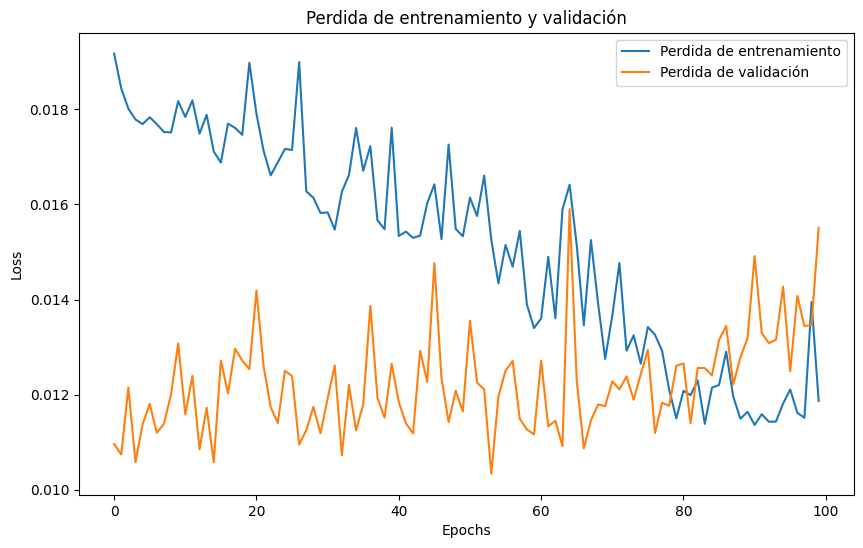

In [ ]:
# visualizar el entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Perdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Perdida de validación')
plt.title('Perdida de entrenamiento y validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Predecir y visualizar los resultados
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

4/4 [==============================] - 0s 6ms/step


In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

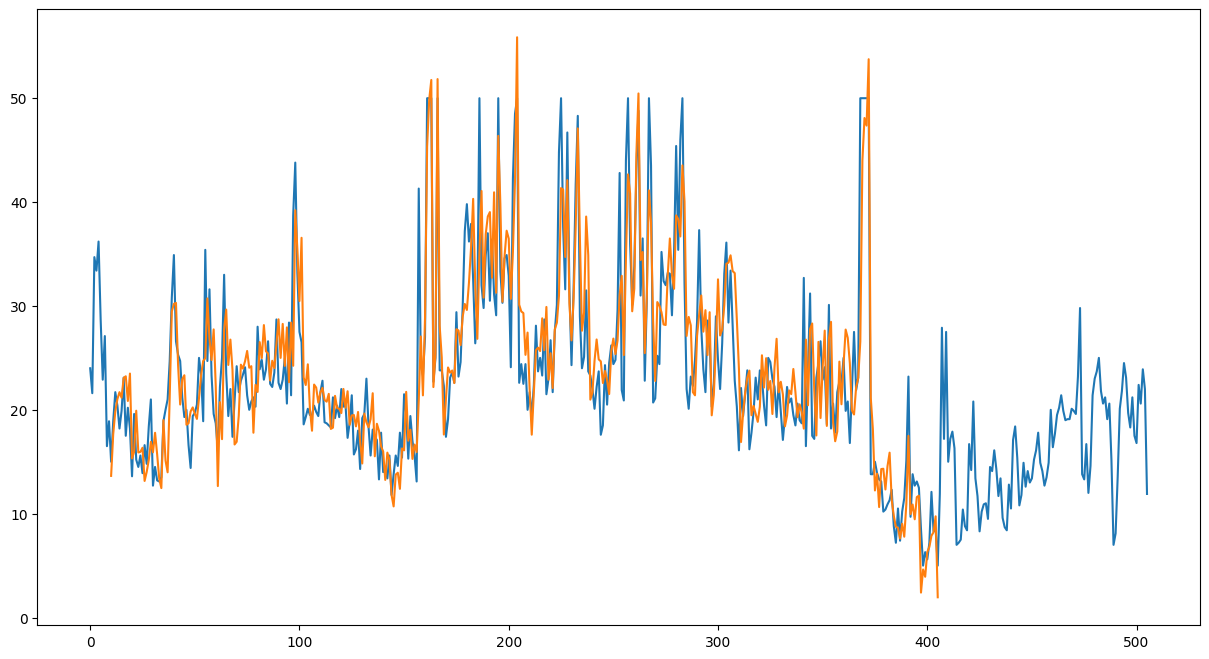

In [ ]:
# Visualización
plt.figure(figsize=(15, 8))
plt.plot(scaler.inverse_transform(ts_scaled), label='Datos originales')
train_predict_plot = np.empty_like(ts_scaled)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_step:len(train_predict)+time_step, :] = train_predict
plt.plot(train_predict_plot, label='Entrenamiento de predicción')